## Introductory Visualizations: Prior to Machine Learning

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.axes
%matplotlib inline

In [75]:
Data = pd.read_csv('FinalData.csv')
Data.head()
pd.DataFrame(Data.columns, columns=['Attributes']).drop([0, 1, 2, 4, 22], axis=0).reset_index(drop=True)

,Attributes
0,explicit
1,acousticness
2,danceability
3,duration_ms
4,energy
5,instrumentalness
6,key
7,liveness
8,loudness
9,mode


In [4]:
Scraper = pd.read_csv('SpotifyCharts_2017-2020.csv')
Scraper.head()

,position,track,artist,streams,date
0,1,Bad and Boujee (feat. Lil Uzi Vert),Migos,"1,371,493",1/1/2017
1,2,Fake Love,Drake,"1,180,074",1/1/2017
2,3,Starboy,The Weeknd,"1,064,351",1/1/2017
3,4,Closer,The Chainsmokers,"1,010,492",1/1/2017
4,5,Black Beatles,Rae Sremmurd,"874,289",1/1/2017


In [53]:
rnd = Data.sample(n=10)[['track', 'artist', 'Y']]
tracks = rnd['track'].tolist()
tracks

['Honest',
 'MoshPit (feat. Juice WRLD)',
 'Delicate - Recorded at The Tracking Room Nashville',
 'Rewrite The Stars (with James Arthur & Anne-Marie)',
 'Dubai Shit',
 'Wake Up in the Sky',
 'Motorcycle Patches',
 'No Flag',
 'TAlk tO Me (with Rich The Kid feat. Lil Wayne) - Remix',
 'Changed It']

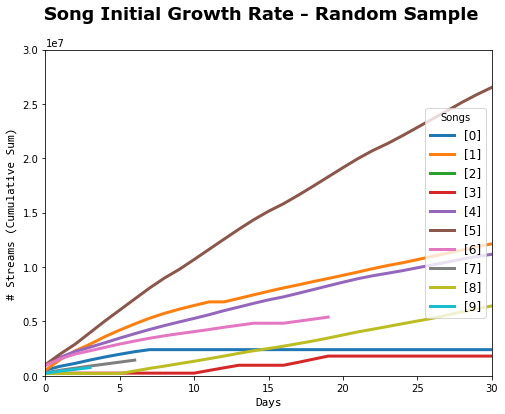

In [54]:
fig = plt.figure(num=1, figsize=(8, 6))
fig.suptitle("Song Initial Growth Rate - Random Sample", fontname="Verdana", fontsize=18, fontweight='bold')
plt.xlabel('Days', fontname="Consolas", fontsize=12)
plt.ylabel("# Streams (Cumulative Sum)", fontname="Consolas", fontsize=12)
for n in range(0, len(tracks)):
    test = Scraper.loc[Scraper['track'] == tracks[n]].reset_index(drop=True)
    test['date'] = pd.to_datetime(test['date'])
    a = test.date.min()
    b = test.date.max()
    date = pd.DataFrame(pd.date_range(start = a, end = b, freq = 'd'))
    date.columns = ['date']
    date = pd.merge(date, test, how='left', on='date')
    date['streams'] = date['streams'].str.replace(',','')
    date['streams'] = pd.to_numeric(date['streams'].replace(np.nan, 0))
    date['S'] = date.streams.cumsum()
    plt.plot(date.index, date.S, linewidth=3, label=[n])
    plt.legend(loc='center right', fontsize='large', title='Songs', fancybox=True)
    plt.xlim(left=0, right=30)
    plt.ylim(bottom=0, top=30000000)
    plt.savefig('InitialGrowthRate.png')

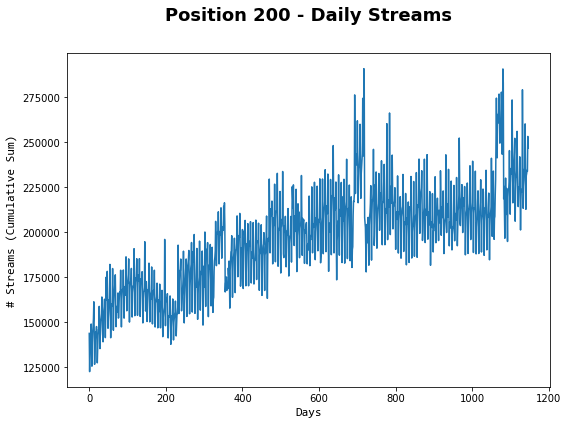

In [64]:
fig = plt.figure(num=2, figsize=(8, 6))
plt.title("Position 200 - Daily Streams", fontweight='bold', fontsize=18, y=1.08)
Last = Scraper.loc[Scraper['position']==200].reset_index(drop=True)
Last['streams'] = Last['streams'].str.replace(',','')
Last['streams'] = pd.to_numeric(Last['streams'].replace(np.nan, 0))
Y = Last['streams']
X = Last.index
ax2 = plt.plot(X, Y)
plt.xlabel('Days', fontname="Consolas", fontsize=12)
plt.ylabel("# Streams (Cumulative Sum)", fontname="Consolas", fontsize=12)
plt.tight_layout()
plt.savefig('Position200.png')
plt.show()

In [66]:
Scraper.head()

,position,track,artist,streams,date
0,1,Bad and Boujee (feat. Lil Uzi Vert),Migos,"1,371,493",1/1/2017
1,2,Fake Love,Drake,"1,180,074",1/1/2017
2,3,Starboy,The Weeknd,"1,064,351",1/1/2017
3,4,Closer,The Chainsmokers,"1,010,492",1/1/2017
4,5,Black Beatles,Rae Sremmurd,"874,289",1/1/2017
